In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import ecco_v4_py as ecco
#from dask.distributed import Client
from glob import glob

import os
import warnings

In [2]:
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

picking up NetCDF formatted monthly data

In [3]:
dataDir = f'/scratch2/shared/ecco/v4r4'

In [4]:
%%time
ds = xr.open_mfdataset(glob(f'{dataDir}/nctiles_monthly/*/*/*.nc'))

CPU times: user 3min 32s, sys: 52 s, total: 4min 24s
Wall time: 10min 54s


In [5]:
ds

<xarray.Dataset>
Dimensions:    (i_g: 90, k: 50, j: 90, tile: 13, time: 312, nv: 2, j_g: 90,
                i: 90)
Coordinates:
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    XC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    ADVx_TH    (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFxE_TH    (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFyE_TH    (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    SALT       (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    THETA      (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    UVELMASS   (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS   (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Fri Aug 16 12:27:32 2019
    time_coverage_start:          1992-01-01T00:00:00
    time_coverage_end:            1992-02-01T00:00:00

Load GRID file

In [6]:
dgrid = xr.open_dataset(f'{dataDir}/nctiles_grid/ECCO-GRID.nc')

<xarray.Dataset>
Dimensions:  (k_p1: 51, j_g: 90, i_g: 90, k: 50, j: 90, k_u: 50, i: 90,
              k_l: 50, tile: 13)
Coordinates: (12/38)
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...       ...
    hFacS    (k, tile, j_g, i) float32 ...
    hFacC    (k, tile, j, i) float32 ...
    hFacW    (k, tile, j, i_g) float32 ...
    maskW    (k, tile, j, i_g) bool ...
    maskC    (k, tile, j, i) bool ...
    maskS    (k, tile, j_g, i) bool ...
Data variables:
    *empty*
Attributes:
    date_created:  Mon Dec 30 11:13:26 2019
    title:         ECCOv4 MITgcm grid information

In [7]:
dgrid.load()
ds = ds.merge(dgrid)
ds

<xarray.Dataset>
Dimensions:    (i_g: 90, k: 50, j: 90, tile: 13, time: 312, nv: 2, j_g: 90,
                i: 90, k_p1: 51, k_u: 50, k_l: 50)
Coordinates: (12/41)
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    Z          (k) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...         ...
    hFacS      (k, tile, j_g, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hFacC      (k, tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hFacW      (k, tile, j, i_g) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maskW      (k, tile, j, i_g) bool False False False ... False False False
    maskC      (k, tile, j, i) bool False False False ... False False False
    maskS      (k, tile, j_g, i) bool False False False ... False False False
Dimensions without coordinates: nv
Data variables:
    ADVx_TH    (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFxE_TH    (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFyE_TH    (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    SALT       (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    THETA      (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    UVELMASS   (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS   (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Fri Aug 16 12:27:32 2019
    time_coverage_start:          1992-01-01T00:00:00
    time_coverage_end:            1992-02-01T00:00:00

Checking I loaded correctly by plotting surface tempertaure, SST. LLC grid proving to be a headache...

<xarray.DataArray 'THETA' (tile: 13, j: 90, i: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates: (12/15)
    k        int64 0
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    Z        float32 -5.0
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    XC       (tile, j, i) float32 -111.6 -111.3 -110.9 ... -99.42 -105.6 -111.9
    ...       ...
    Depth    (tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    rA       (tile, j, i) float32 3.623e+08 3.633e+08 ... 3.685e+08 3.611e+08
    PHrefC   float32 49.05
    drF      float32 10.0
    hFacC    (tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    maskC    (tile, j, i) bool False False False False ... False False False

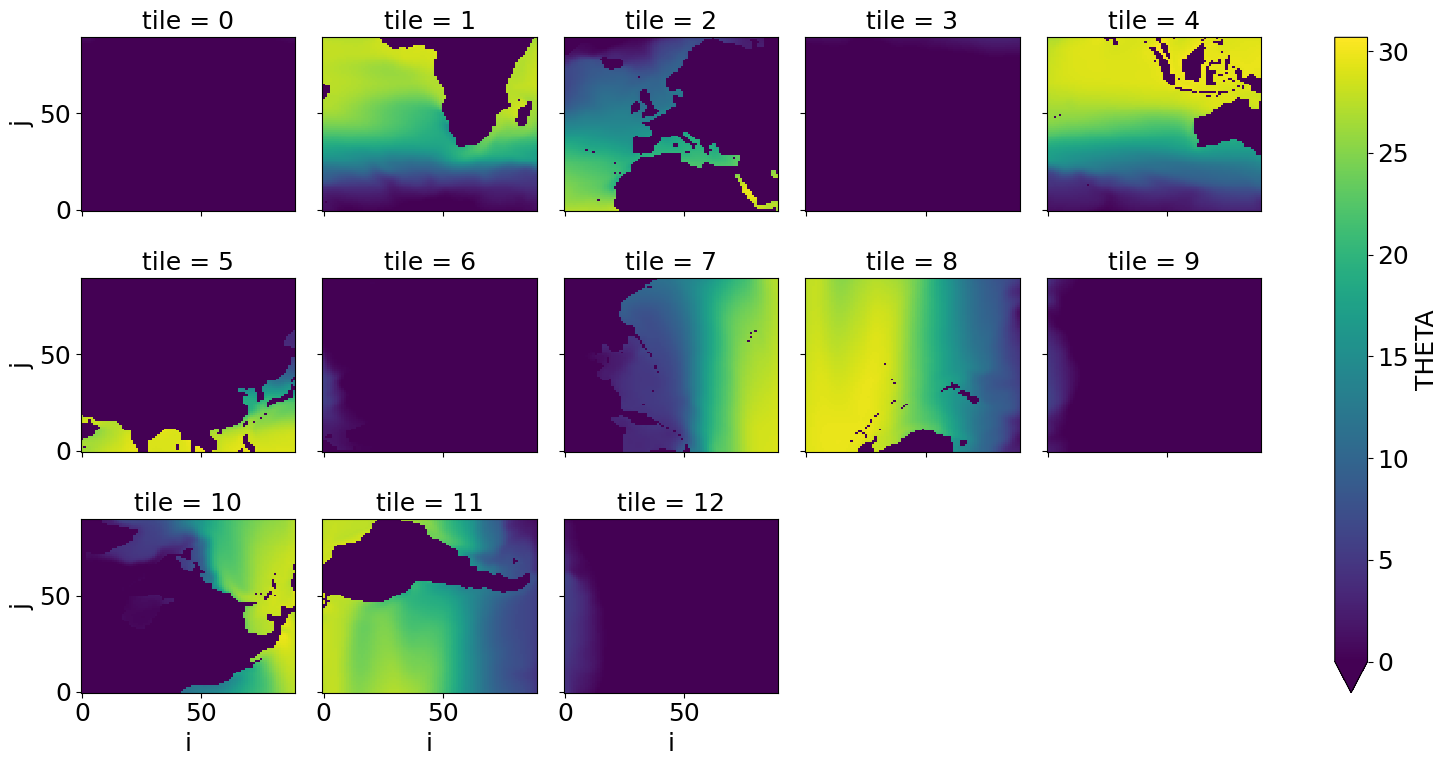

In [12]:
sst = ds.THETA.isel(k=0).mean('time')
display(sst)
sst.plot(col='tile',col_wrap=5,figsize=(16,8), vmin=0)

## Show rotated indices

Tile 2 is *NOT* rotated, Tile 10 *IS* rotated. This means that the index **i** corresponds to change in *longitude* in Tile 2 and change in *latitude* in Tile 10. 

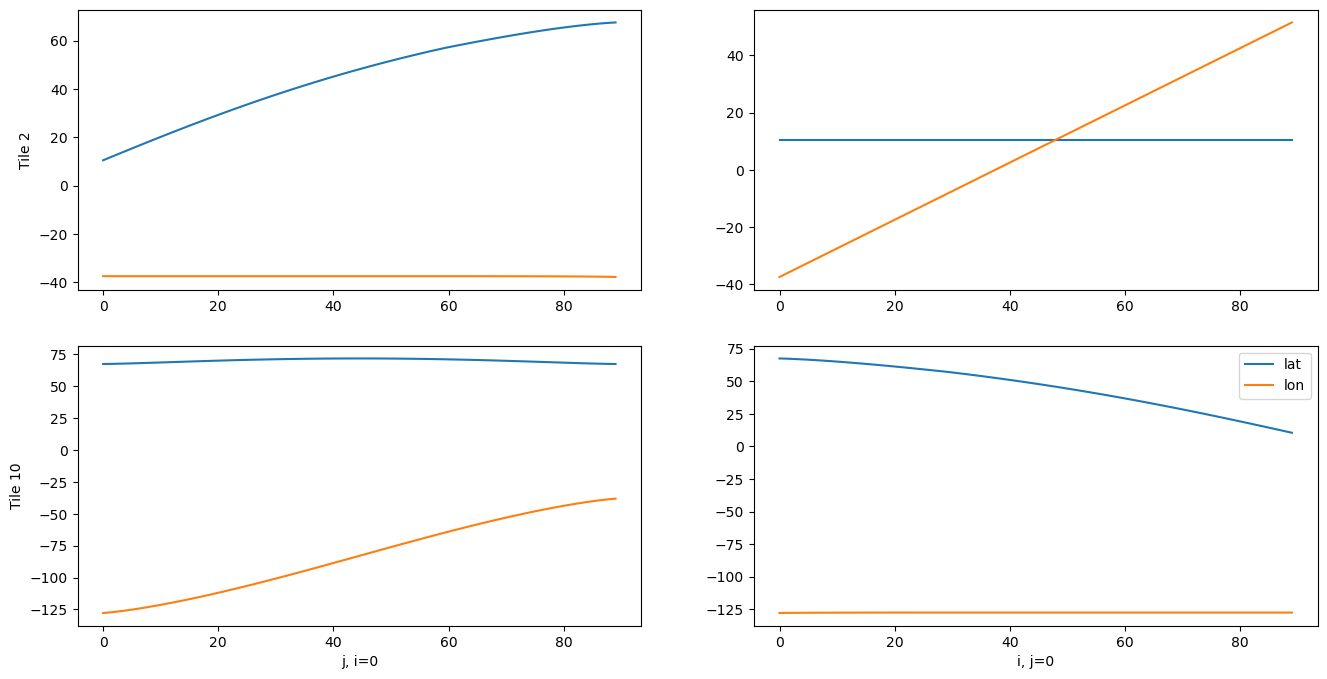

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(221)
plt.plot( ds.YC.sel(tile=2, i=0), label='lat')
plt.plot( ds.XC.sel(tile=2, i=0), label='lon' )
plt.ylabel('Tile 2')

plt.subplot(223)
plt.plot( ds.YC.sel(tile=10, i=0), label='lat')
plt.plot( ds.XC.sel(tile=10, i=0), label='lon' )
plt.xlabel('j, i=0')
plt.ylabel('Tile 10')

plt.subplot(222)
plt.plot( ds.YC.sel(tile=2, j=0), label='lat')
plt.plot( ds.XC.sel(tile=2, j=0), label='lon' )

plt.subplot(224)
plt.plot( ds.YC.sel(tile=10, j=0), label='lat')
plt.plot( ds.XC.sel(tile=10, j=0), label='lon' )

plt.xlabel('i, j=0')
plt.legend()
plt.show()

## Some standard looking plots

Plot on lat lon projection, easy thanks to ECCO-v4_py. Robinson and Orthographic projections. 

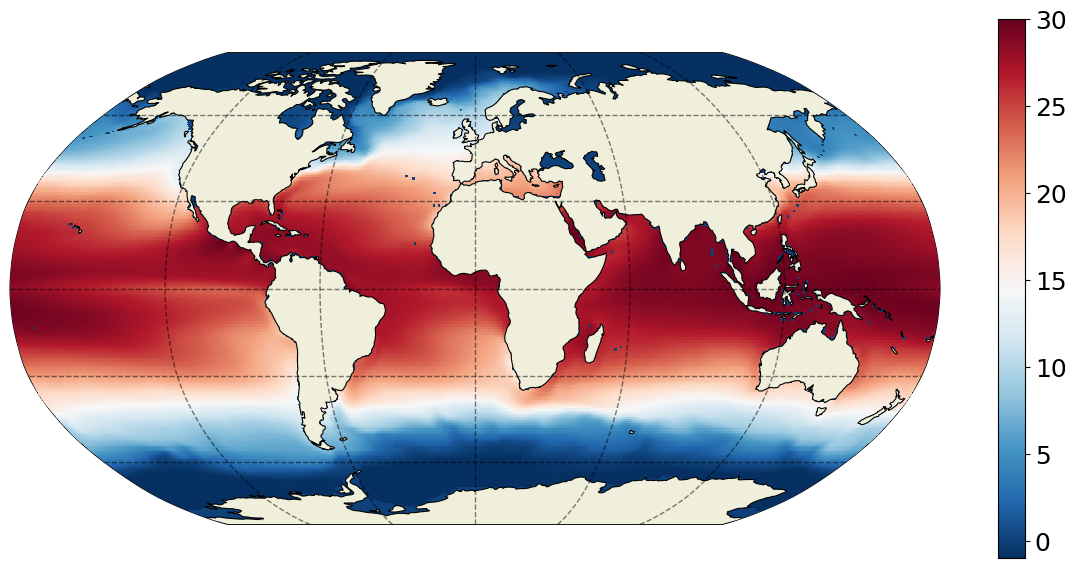

In [10]:
plt.rcParams.update({'figure.figsize':(15,7),'font.size':18})

ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sst,
                              show_colorbar=True,
                              cmin=-1, cmax=30 );
#plt.savefig('../img/eccov4r4-SST.png')

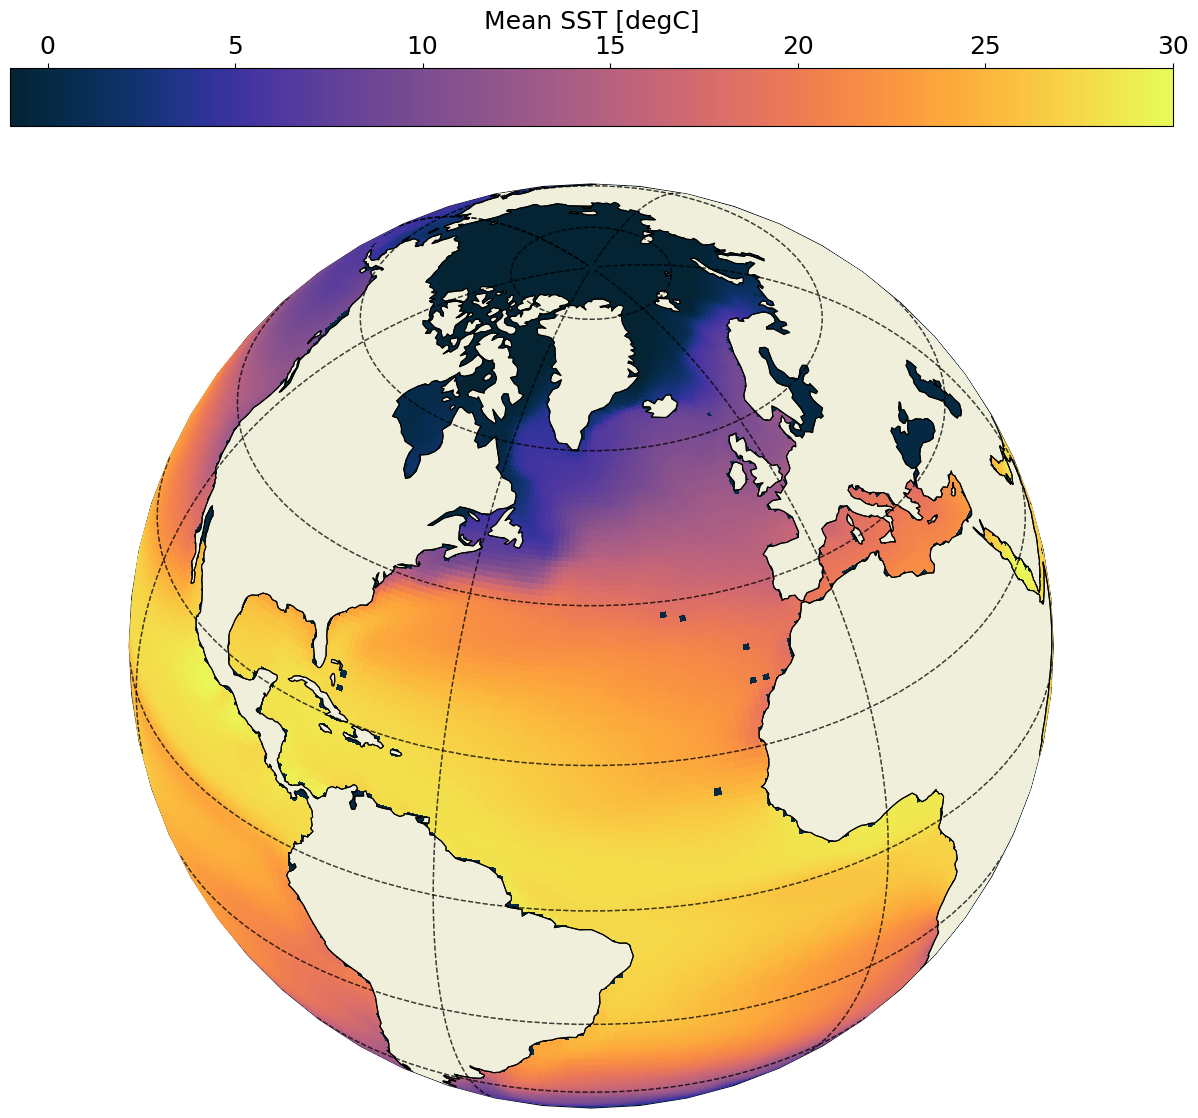

In [11]:
plt.rcParams.update({'figure.figsize':[15,15],'font.size':18})

ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sst,
                              show_colorbar=True, cmap=cmo.thermal, 
                              colorbar_label=f'Mean SST [{ds.THETA.attrs["units"]}]',
                              colorbar_location='top',
                              projection_type='ortho',
                              cmin=-1,cmax=30,
                              user_lon_0=-40,
                              user_lat_0=35 );

#plt.savefig('eccov4r4-SST-ortho.png', bbox_inches="tight")